# Notebook for testing the SETP-identification algorithms

In [1]:
from classes import *
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
import random
import ruptures as rpt

from tqdm.notebook import trange, tqdm

from matplotlib import patches
from matplotlib.collections import PatchCollection

In [2]:
#Load the experiments
input_path = "temp/experiments/experiment_2020_9_21.p"
output_path = os.path.dirname(input_path)
experiments = pickle.load( open( input_path, "rb" ) )
print(len(experiments))

720


In [3]:
window = 4 #The size of the rolling window
margin = 2 # The margin around the TP

#Criteria
c1 = 0.15 #fraction of change relative to house price at t0
c2 = 5e9 #variance
c3 = 10 #percent

experiments = experiments[0:100]

with tqdm(total=len(experiments)) as pbar:
    for experiment in experiments:
        experiment.create_Metrics() #TODO: GIVE CONTROL OVER THE METRICS TO BE CREATED
        for M in experiment.allMetrics:
            M.create_statistics() #Create summary statistics for the metric(t)
            #M.select_candidates(c1=c1,c2=c2,c3=c3,window=window,margin=margin) #Evaluate the three tipping point criteria
            #M.first_SETP = M.candidates['rapid change_neg'].first_valid_index() #The first year in which a rapid change is found
        pbar.update(1)
            #M.plot_both(figsize=(15,20),exp_name=experiment.name)

### Select an interesting metric to improve the signal analysis

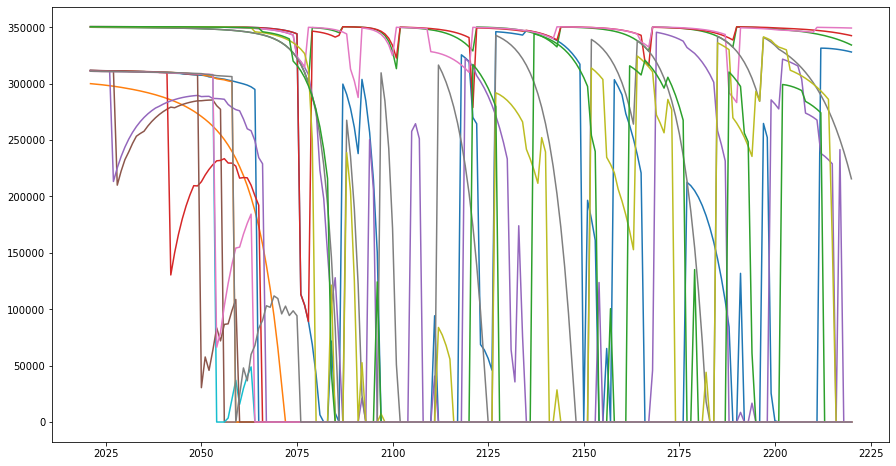

In [4]:
#Select some experiments with interesting signals
sel_experiments = sel_exp(experiments,['01','02'],'All',['R. Active','Sentiment'])

#Intereting shapes
A0_r = [1,69] #area 0 rational
A0_br = [3,5,7,9,11,15,19,45,49,59] # area 0 boundedly rational
A1_r = [1,4]
A1_br = [0,1,2,3,4,10]

M_sel = [] #List Pd Series containing interesting metrics

for i,exp in enumerate(sel_experiments):
    if i in A0_r:
        M_sel.append(exp.allMetrics[0])
    if i in A0_br:
        M_sel.append(exp.allMetrics[1])
    if i in A1_r:
        M_sel.append(exp.allMetrics[2])
    if i in A1_br:
        M_sel.append(exp.allMetrics[3])

M_sel

fig, ax = plt.subplots(figsize=(15,8))
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

for series in M_sel:
    series.raw.plot(ax=ax)

[2059__-1__real__None_]
[2059]


(<Figure size 1080x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002149824FD30>,
       dtype=object))

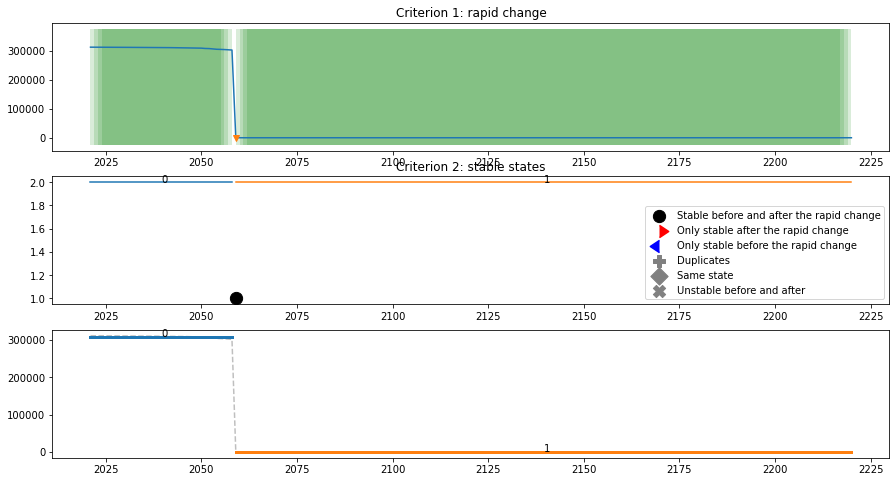

In [18]:
metric = M_sel[11]

metric.find_SETP_candidates(c1=0.15,c2=0.2e10,c3=10, window=4,margin=2)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
metric.plot_SETPs(window=4)

Here the algorithm works perfectly, but it also is a rather easy situation, of course.

[2054__-1__real__None_, 2064__-1__sw__None_]
[2054]


(<Figure size 1080x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002149C820B80>,
       dtype=object))

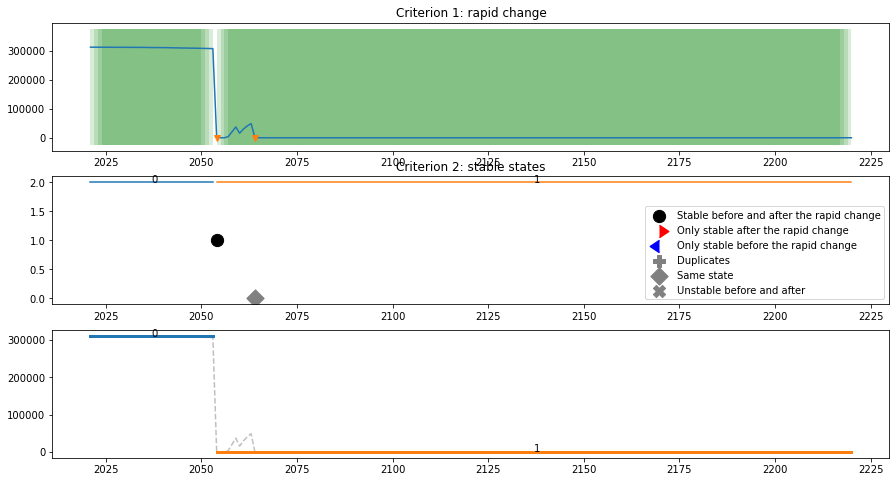

In [21]:
metric = M_sel[9]

metric.find_SETP_candidates(c1=0.15,c2=0.2e10,c3=10, window=4,margin=2)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
metric.plot_SETPs(window=4)

Hier detecteert hij ook netjes dat alleen de eerste situatie een shift van de ene naar de andere state is.

[2085__-1__ob__None_, 2086__-1__oa__dup_first -dups with: (2088), 2088__1__oa__dup_, 2091__-1__sw__dup_first -dups with: (2092), 2092__-1__sw__dup_, 2097__1__real__None_, 2100__-1__oa__dup_first -dups with: (2101), 2101__-1__oa__dup_, 2112__1__real__None_, 2127__1__oa__None_, 2152__1__real__None_, 2164__1__sw__None_, 2182__-1__oa__dup_first -dups with: (2185), 2185__1__oa__dup_, 2197__1__sw__None_]
[]


(<Figure size 1080x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002149CD64FD0>,
       dtype=object))

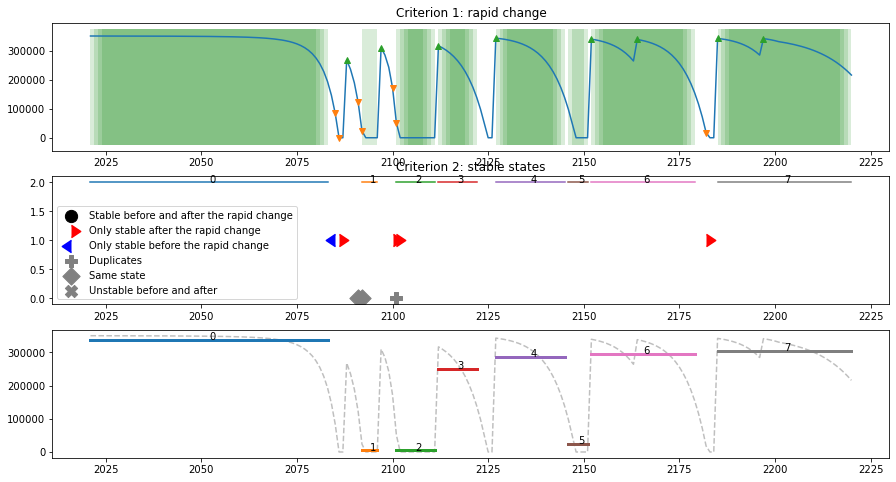

In [23]:
metric = M_sel[7]

metric.find_SETP_candidates(c1=0.15,c2=0.2e10,c3=10, window=4,margin=2)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
metric.plot_SETPs(window=4)

In deze situatie ziet hij geen enkel echt tipping point. Hij ziet wel een aantal situaties met een stabiele situatie voor **of** na de rapid change, maar geen situatie met stabiliteit voor **en** na de rapid change.

[2092__1__sw__dup_first -dups with: (2191), 2191__1__sw__dup_]
[]


(<Figure size 1080x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021496A70820>,
       dtype=object))

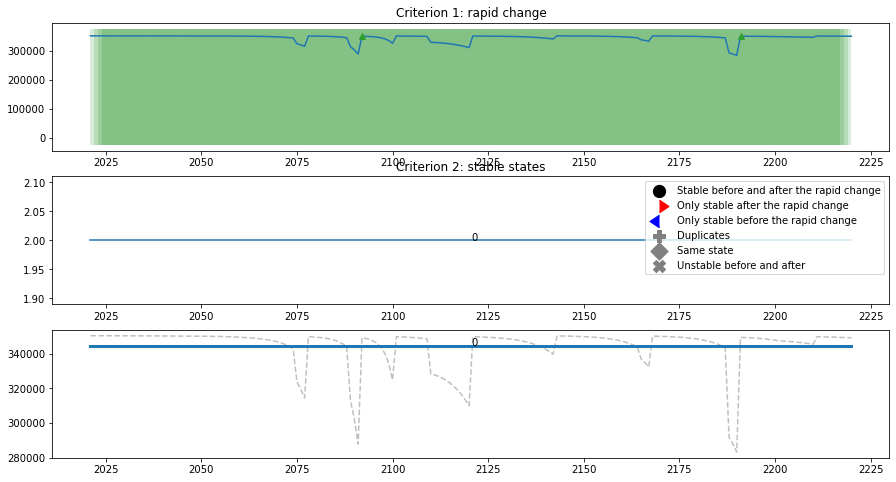

In [25]:
metric = M_sel[6]

metric.find_SETP_candidates(c1=0.15,c2=0.2e10,c3=10, window=4,margin=2)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
metric.plot_SETPs(window=4)

Hier zitten helemaal geen tipping points in. Wel 2x rapid change, maar alles is dezelfde state.

[2028__-1__real__None_, 2056__-1__real__None_]
[2028, 2056]


(<Figure size 1080x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000214982501C0>,
       dtype=object))

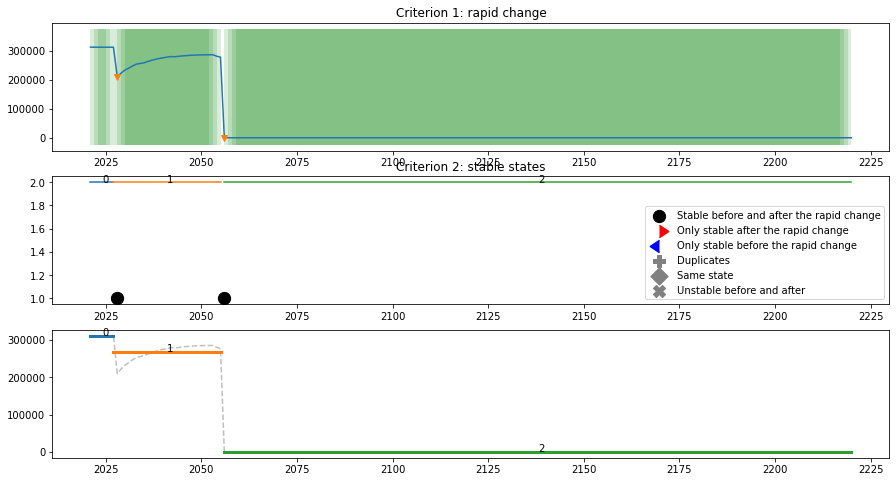

In [27]:
metric = M_sel[5]

metric.find_SETP_candidates(c1=0.15,c2=0.2e10,c3=10, window=4,margin=2)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
metric.plot_SETPs(window=4)

Hier twee hele duidelijke tipping points.

[2081__-1__real__None_, 2086__-1__oa__dup_first -dups with: (2087), 2087__-1__oa__dup_, 2094__1__real__None_, 2096__-1__oa__None_, 2105__1__real__None_, 2108__-1__oa__None_, 2119__1__real__None_, 2131__-1__real__None_, 2133__1__oa__dup_first -dups with: (2134, 2135), 2134__-1__oa__dup_, 2135__-1__oa__dup_, 2154__1__real__dup_first -dups with: (2155), 2155__-1__real__dup_, 2169__1__real__None_, 2188__-1__real__None_, 2199__1__real__None_, 2216__-1__ob__dup_first -dups with: (2217), 2217__1__ob__dup_, 2218__-1__sw__None_]
[2081, 2131, 2188, 2155]


(<Figure size 1080x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021497002F40>,
       dtype=object))

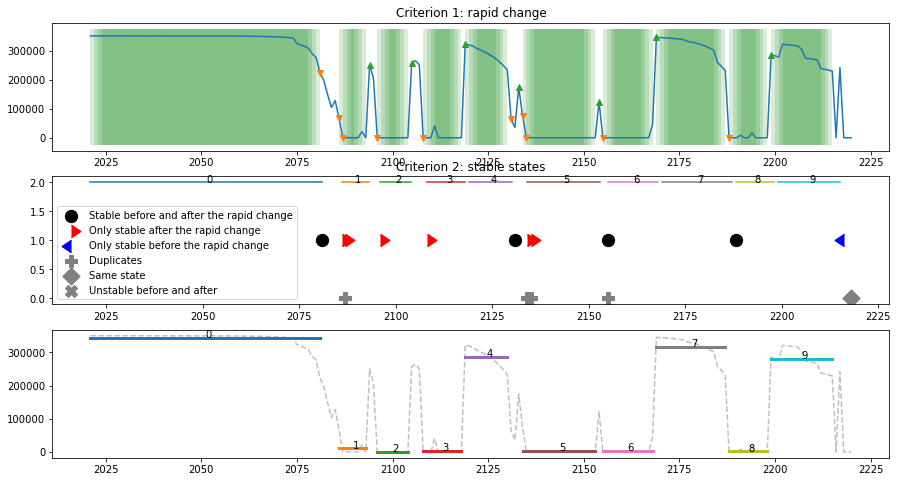

In [28]:
metric = M_sel[4]

metric.find_SETP_candidates(c1=0.15,c2=0.2e10,c3=10, window=4,margin=2)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
metric.plot_SETPs(window=4)

Dit gaat al best wel goed maar nog niet helemaal. De eerste is inderdaad duidelijk een tipping point. Maar de tweede en derde zijn in feite nog steeds dezelfde state shift, maar dat herkent hij niet.
Wat ook niet helemaal goed gaat: de eerste twee rode puntjes zijn zowel > maar ook +. Nu plot hij dat als beiden.

[2076__-1__real__None_, 2079__1__oa__None_, 2121__-1__sw__dup_first -dups with: (2122), 2122__1__sw__dup_]
[2076]


(<Figure size 1080x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002149A1689D0>,
       dtype=object))

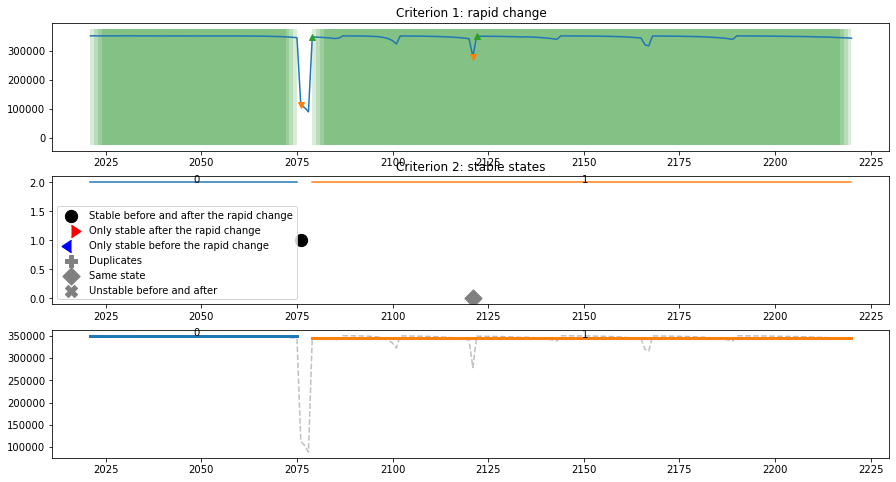

In [29]:
metric = M_sel[3]

metric.find_SETP_candidates(c1=0.15,c2=0.2e10,c3=10, window=4,margin=2)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
metric.plot_SETPs(window=4)

Dit is weer helemaal goed

[]
[]


(<Figure size 1080x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021499AA4130>,
       dtype=object))

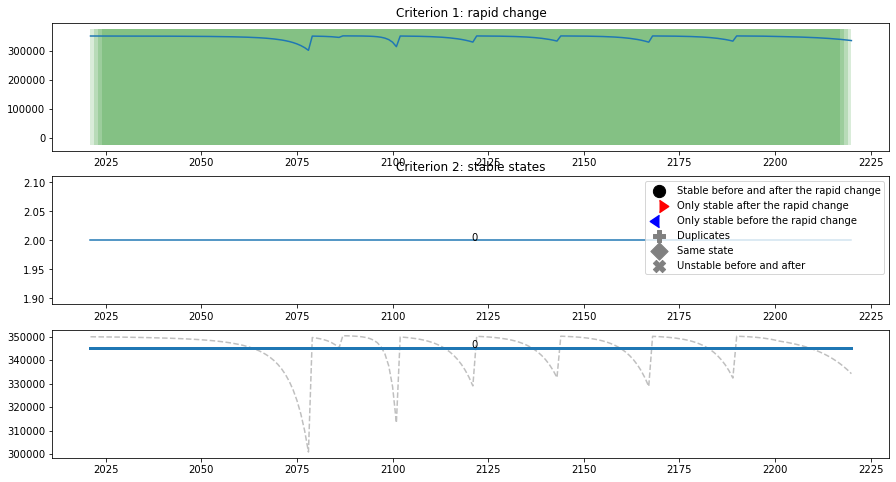

In [31]:
metric = M_sel[2]

metric.find_SETP_candidates(c1=0.15,c2=0.2e10,c3=10, window=4,margin=2)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
metric.plot_SETPs(window=4)

Dit ook

[2076__-1__real__None_, 2084__1__real__dup_first -dups with: (2085, 2087), 2085__-1__real__dup_, 2087__1__real__dup_, 2092__1__real__dup_first -dups with: (2096, 2097), 2096__-1__real__dup_, 2097__-1__real__dup_, 2111__1__sw__None_, 2112__-1__real__None_, 2118__1__ob__None_, 2123__-1__real__None_, 2127__1__oa__None_, 2150__-1__ob__dup_first -dups with: (2151), 2151__1__ob__dup_, 2154__-1__oa__dup_first -dups with: (2156, 2157, 2158), 2156__1__oa__dup_, 2157__-1__oa__dup_, 2158__1__oa__dup_, 2166__-1__real__None_, 2177__1__real__None_, 2189__-1__real__None_, 2191__1__sw__dup_first -dups with: (2192), 2192__-1__sw__dup_, 2197__1__real__None_, 2199__-1__oa__None_, 2212__1__real__None_]
[2076, 2112, 2123, 2166, 2189, 2085, 2096]


(<Figure size 1080x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021499F848E0>,
       dtype=object))

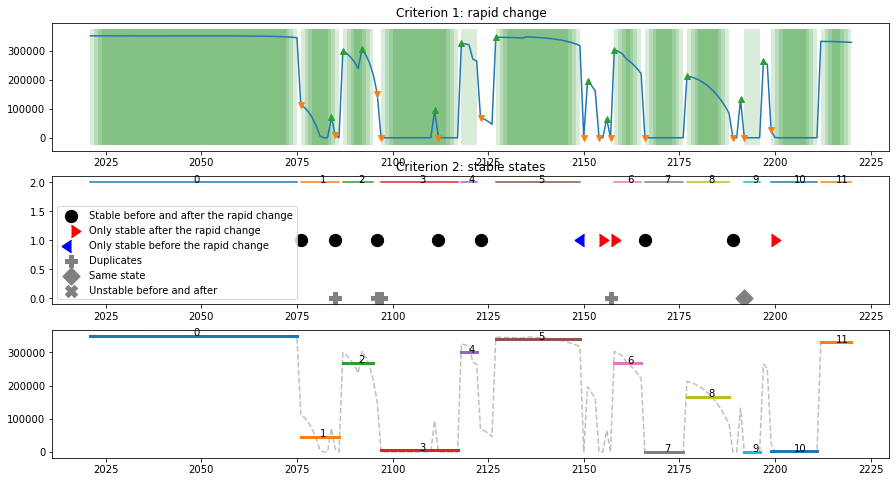

In [33]:
metric = M_sel[0]

metric.find_SETP_candidates(c1=0.15,c2=0.2e10,c3=10, window=4,margin=2)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
metric.plot_SETPs(window=4)

Dit zijn de complexe situaties... De eerste klopt sowieso, dat is eigenlijk het belangrijkst...

[2084__-1__real__None_, 2096__1__real__dup_first -dups with: (2097), 2097__-1__real__dup_, 2121__1__real__None_, 2128__-1__real__None_, 2137__1__real__None_, 2154__-1__ob__None_, 2157__1__oa__dup_first -dups with: (2158, 2162), 2158__-1__oa__dup_, 2162__1__oa__dup_, 2177__-1__real__None_, 2179__1__oa__dup_first -dups with: (2180), 2180__-1__oa__dup_, 2188__1__real__None_, 2194__-1__real__dup_first -dups with: (2195), 2195__-1__real__dup_, 2202__1__real__None_, 2213__-1__real__None_]
[2084, 2128, 2177, 2194, 2213, 2097]


(<Figure size 1080x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002149CC2C370>,
       dtype=object))

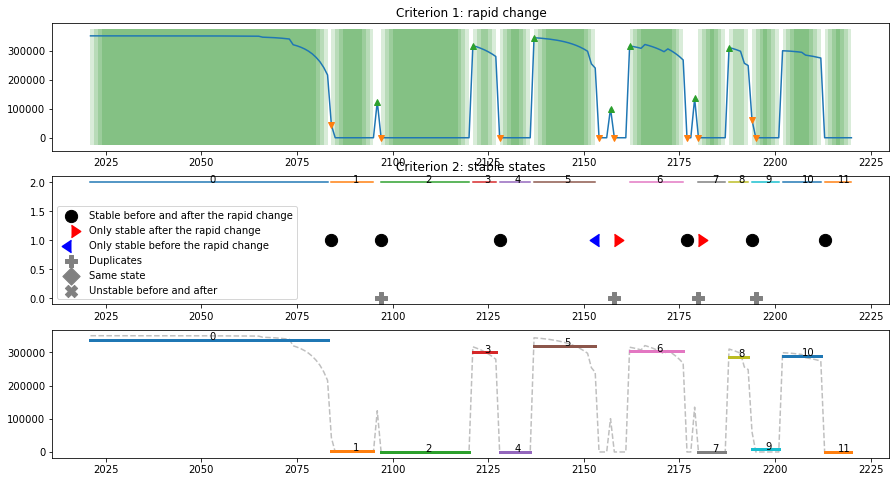

In [34]:
metric = M_sel[12]

metric.find_SETP_candidates(c1=0.15,c2=0.2e10,c3=10, window=4,margin=2)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
metric.plot_SETPs(window=4)

Hier gaat het ook goed.

[2042__-1__real__None_, 2066__-1__real__None_]
[2042, 2066]


(<Figure size 1080x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000214987A5B80>,
       dtype=object))

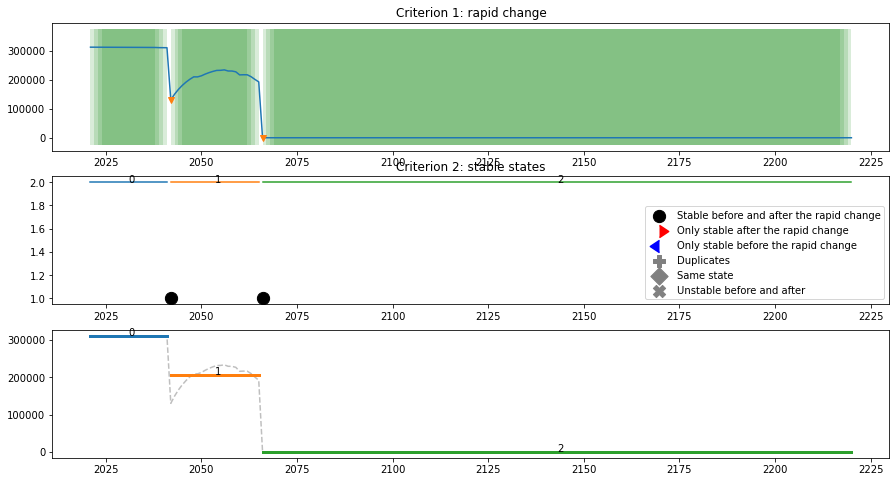

In [35]:
metric = M_sel[13]

metric.find_SETP_candidates(c1=0.15,c2=0.2e10,c3=10, window=4,margin=2)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
metric.plot_SETPs(window=4)

Dit is ook heel netjes.

[2050__-1__real__None_, 2060__-1__real__None_]
[2050, 2060]


(<Figure size 1080x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000214989D18B0>,
       dtype=object))

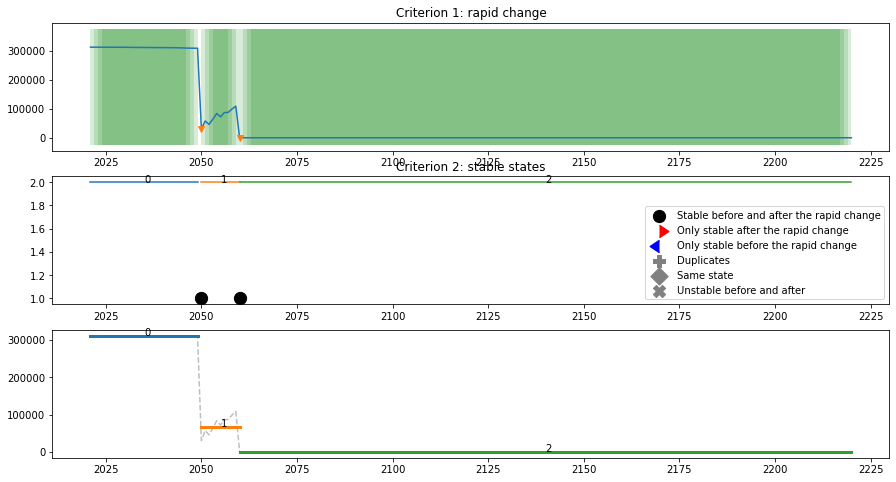

In [37]:
metric = M_sel[15]

metric.find_SETP_candidates(c1=0.15,c2=0.2e10,c3=10, window=4,margin=2)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
metric.plot_SETPs(window=4)

Deze ook

### Old stuff

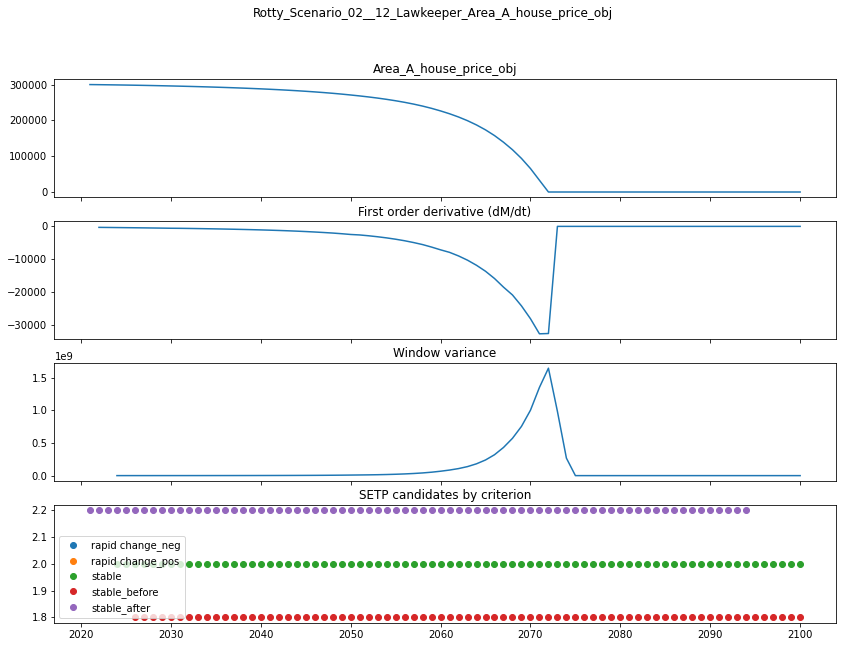

In [157]:
M = M_sel[1]

window = 4 #The size of the rolling window
margin = 2 # The margin around the TP

#Criteria
c1 = 0.15*350_000 #make different per RA (300,000 and 350,000)
c2 = 1e10 #variance
c3 = 10 #percent

M.create_statistics(domain=(2000,2100),window=window)
M.select_candidates(c1=c1,c2=c2,c3=c3,window=window,margin=margin)    
M.plot_both(figsize=(14,10),exp_name=experiment.name,drop=['Second order derivative (d2M/dt2)','Window mean'])
plt.legend(loc='lower left')

Index(['Area_A_house_price_obj', 'First order derivative (dM/dt)',
       'Second order derivative (d2M/dt2)', 'Window mean', 'Window variance'],
      dtype='object')


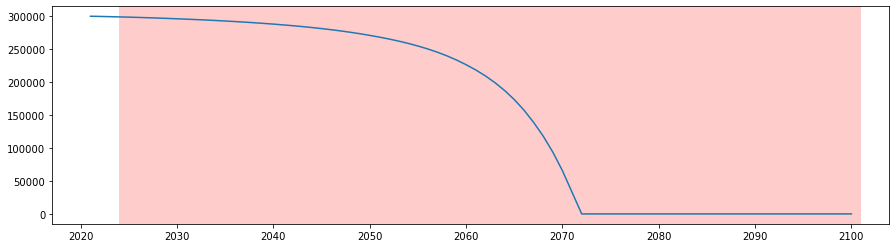

In [121]:
fig, ax = plt.subplots(nrows=1,figsize=(15,4))
print(M.statistics.columns)
col = M.statistics.columns[0]
ax = M.statistics[col].plot(ax=ax)


patches = []
boxes_left = []
series = M.candidates['stable']
for index,value in series.items():
    if not np.isnan(value): #this is a relevant value
        boxes_left.append(index)   
boxes_left

for year in boxes_left:
    art = mpatches.Rectangle((year,- 25_000),1,400_000)
    patches.append(art)

pc = PatchCollection(patches,facecolor='red',alpha=0.2)
ax.add_collection(pc)

In [16]:
#Determine if this signal has a tipping point
M.candidates['rapid change'].loc[2070:2080]
M.first_SETP = M.candidates['rapid change'].first_valid_index() #The first year in which a rapid change is found

### RUPTURES - Pruned Exact Linear Time

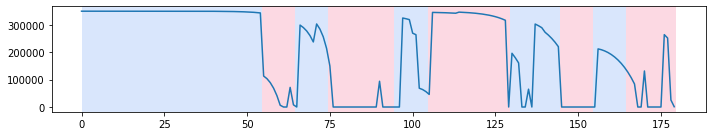

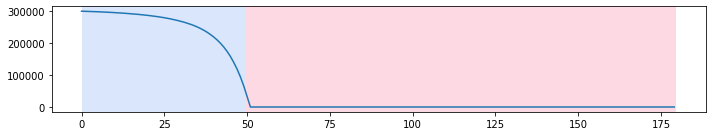

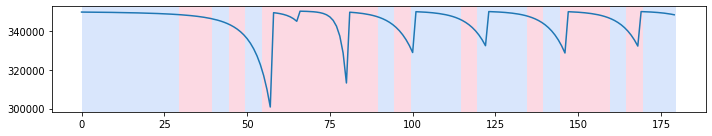

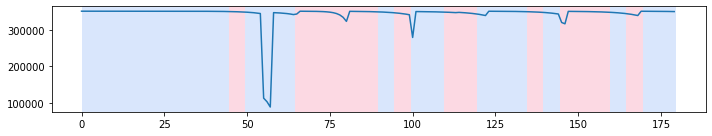

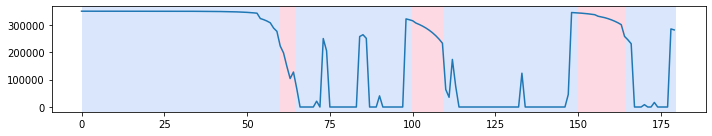

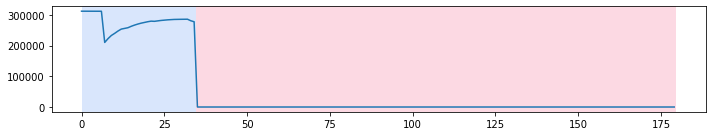

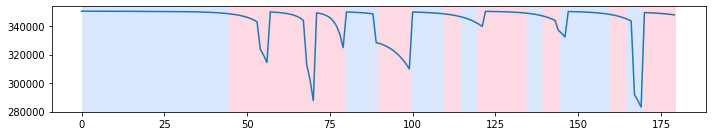

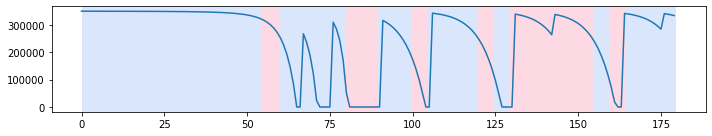

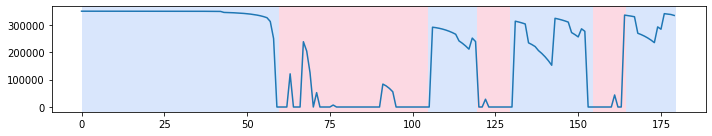

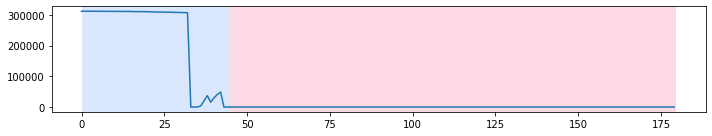

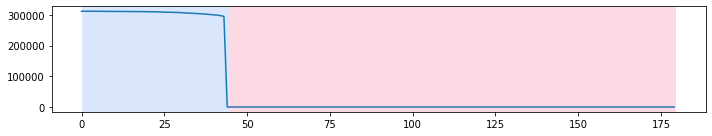

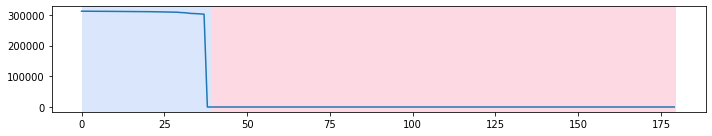

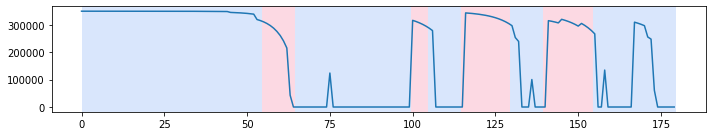

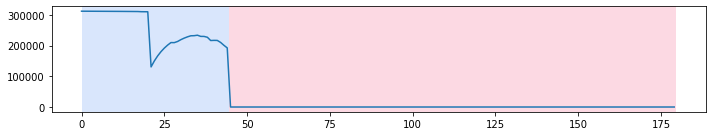

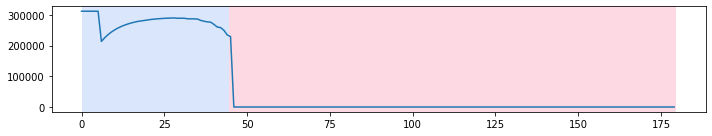

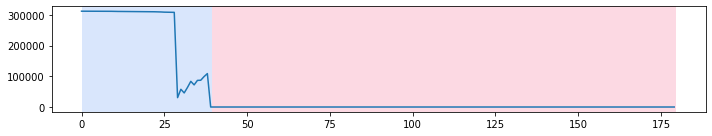

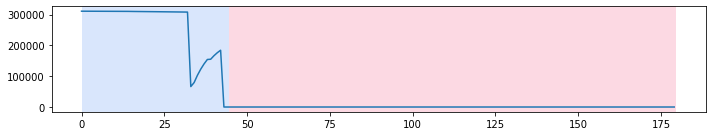

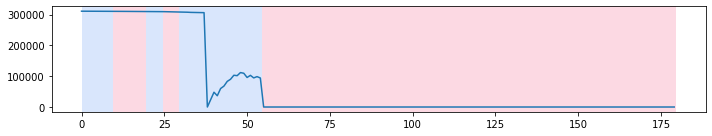

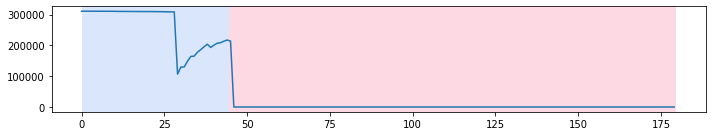

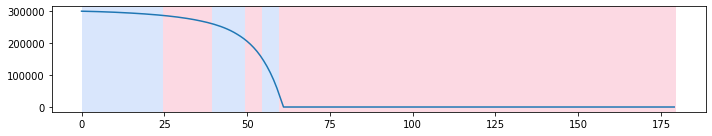

In [64]:
for series in M_sel:
    data
    #RUPTURES PACKAGE
    
    #PELT ANALYSIS Pruned Exact Linear Time
    #Signal
    signal = series.raw[0:180].values

    #Detection
    model = "rbf" # l1, l2, rbf
    min_size = 1 #minimum segement lenghts (years?)
    #jump = 80 #how big should a jump be at least (relates to t-axis???)
    pen = 2 #penalty for overfitting
    algo = rpt.Pelt(model=model,min_size=min_size).fit(signal)
    result = algo.predict(pen=pen)

    #Display
    rpt.display(signal, result)

### Binary change point detection
Documentation: https://github.com/deepcharles/ruptures/blob/master/ruptures/detection/binseg.py

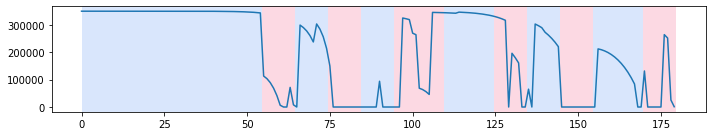

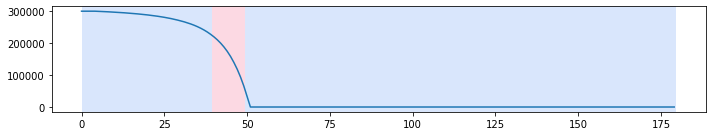

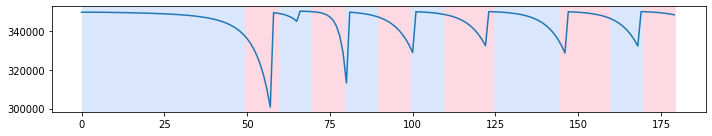

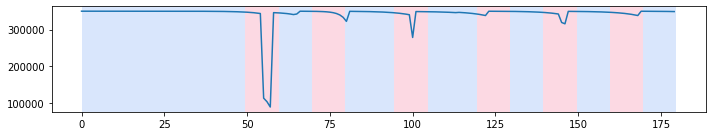

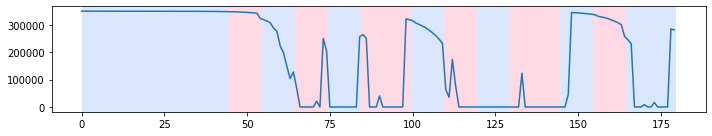

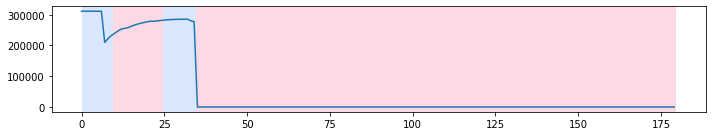

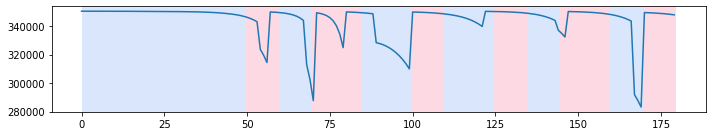

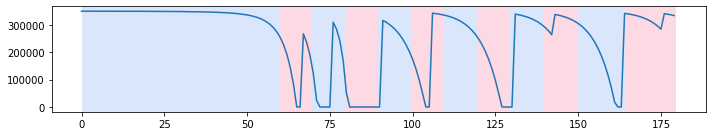

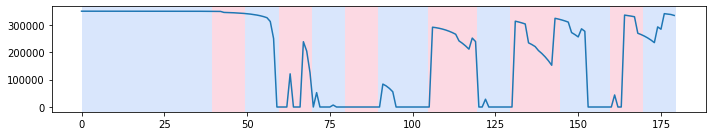

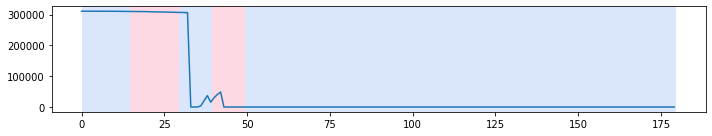

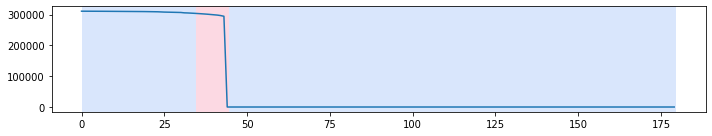

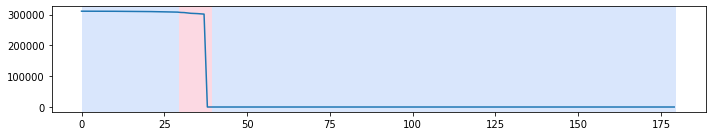

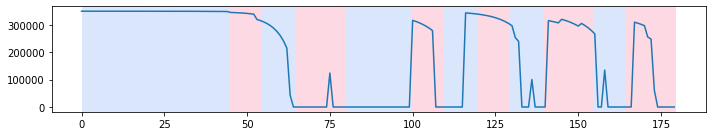

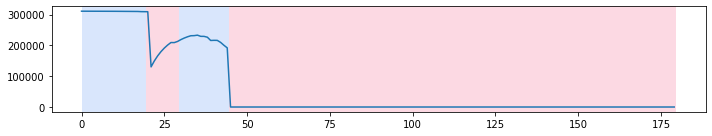

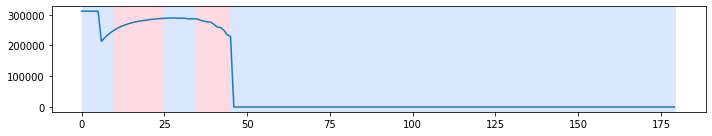

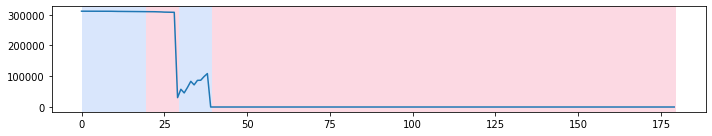

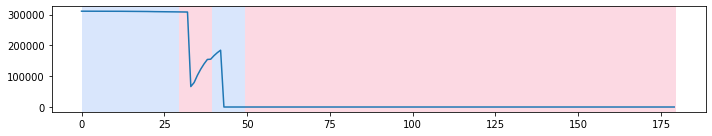

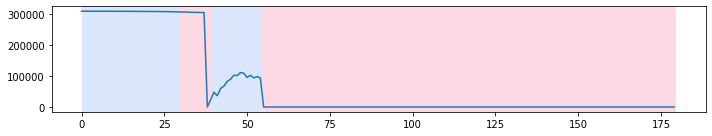

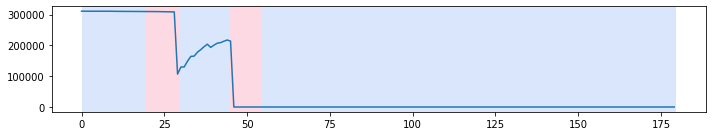

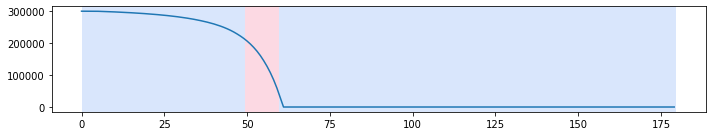

In [84]:
for series in M_sel:
    data
    #RUPTURES PACKAGE
    
    #PELT ANALYSIS
    #Signal
    signal = series.raw[0:180].values

    #Detection
    model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
    pen = 100000 #penalty for overfitting
    min_size=2
    #n_bkps = 3 #number of breakpoints to find before stopping.
    algo = rpt.Binseg(model=model,min_size=min_size).fit(signal)
    result = algo.predict(pen=pen) #n_bkps=n_bkps,

    #Display
    rpt.display(signal, result)

In [7]:
rand = random.choice(sel_experiments)
rand.allMetrics[1].plot_both(figsize=(18,20),exp_name=experiment.name)

NameError: name 'random' is not defined

In [5]:
M = experiment.allMetrics[1]
M

Area_A_house_price_subj

D:\Python\Urban-SETP\classes.py:841: RuntimeWarning: divide by zero encountered in double_scalars
  perc = 100*(avg_a-avg_b)/avg_a


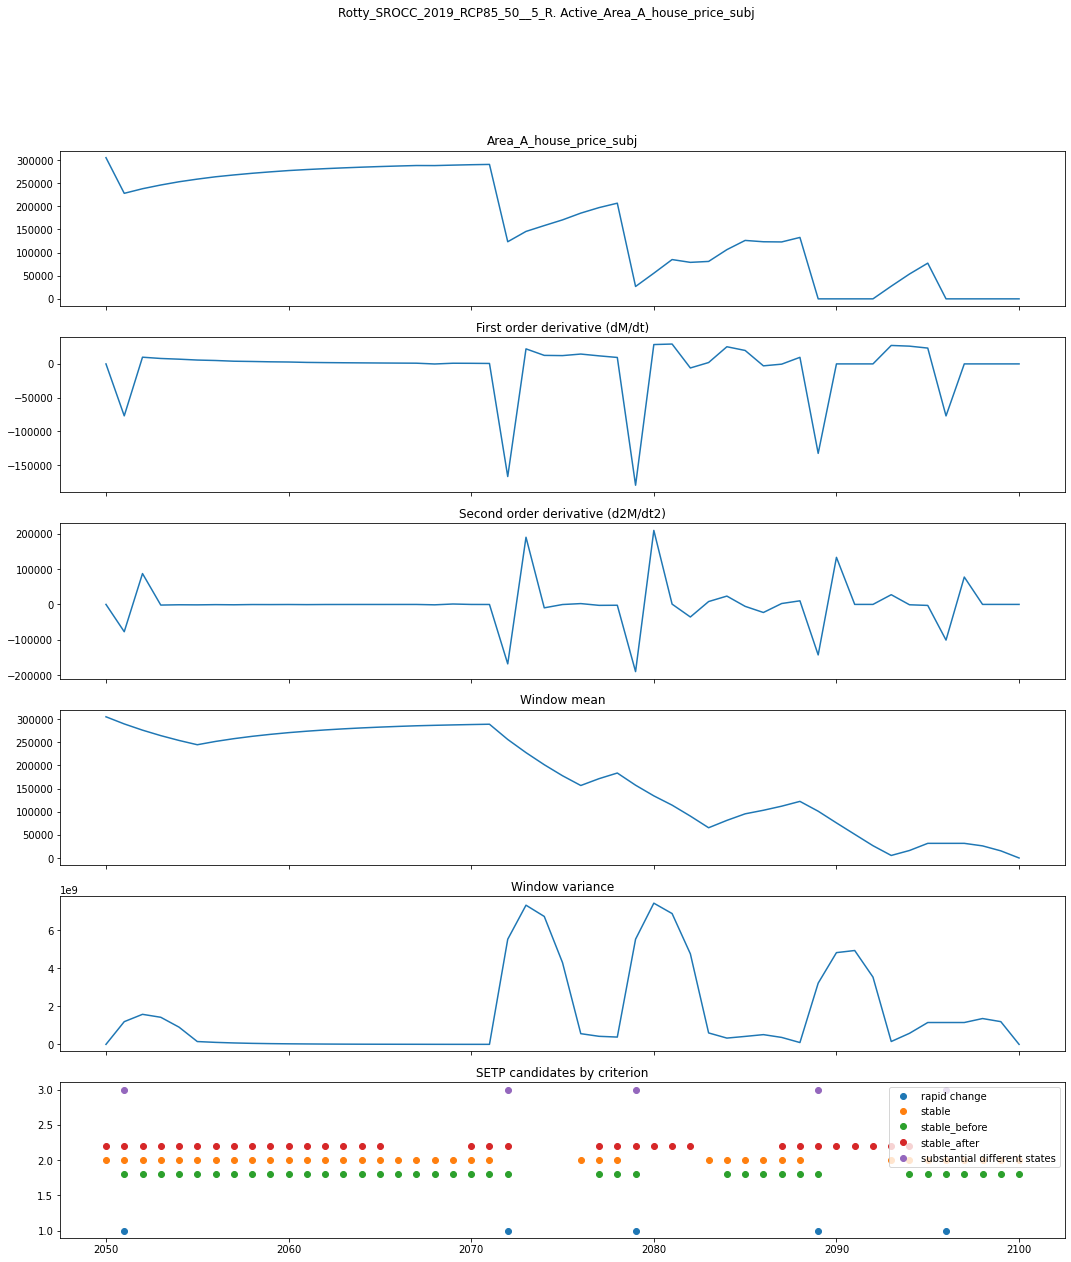

In [8]:
window = 5 #The size of the rolling window
margin = 1 # The margin around the TP
experiment.create_Metrics()
M.create_statistics(domain=(2050,2100),window=window)
M.select_candidates(window=window,margin=margin)    
M.plot_both(figsize=(18,20),exp_name=experiment.name)

### Experiment with K-means

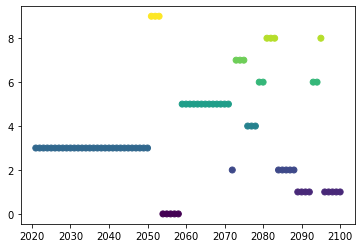

In [44]:
from sklearn.cluster import KMeans
import numpy as np
#K means Clustering 
domain = (2020,2100)

def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

series = M.raw.loc[domain[0]:domain[1]]
data = np.array(series)
data = data.reshape(-1,1)
clust_label, cent = doKmeans(data,nclust=10)
plt.scatter(series.index,clust_label,c=clust_label)